# Boston Dataset modelling with Linear Regression

Import the python libraries needed for this project:

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline

Now Import Boston Dataset from Skikit-Learn..

In [3]:
from sklearn.datasets import load_boston

In [4]:
boston = load_boston()

In [5]:
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [6]:
boston['feature_names']

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [7]:
labels = list(boston['feature_names'])

In [8]:
boston['data']

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]])

Create DF using 'data' key from Boston dictionary as data while the 'feature_names' key will be used as Columns

In [10]:
df = pd.DataFrame(data = boston['data'], columns=labels)

In [11]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [28]:
df.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT'],
      dtype='object')

Create feature matrix X using the NUmeric Columns from the DF

In [15]:
X = df[['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX','PTRATIO', 'B', 'LSTAT']]

Create Target Variable 'y' using the 'target' key from boston dictionary

In [16]:
y = boston['target']

Now import Train_Test_Split module from SKitkit-Learn to create the Test and Train data from the DF..

In [17]:
from sklearn.model_selection import train_test_split

In here 40% of the Dataset has been used for Testing while creating the Train/Test dataset.

In [18]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.4,random_state=101)

Now we have the Dataset ready, we will load the LinearRegression model instance and try to fit our model with the training dataset.

In [19]:
from sklearn.linear_model import LinearRegression

In [20]:
lm = LinearRegression()

In [21]:
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [22]:
print(lm.intercept_)

41.28149654473701


In [24]:
coeff_df = pd.DataFrame(lm.coef_,index = X.columns, columns=['Coefficient'])

In [25]:
coeff_df

,Coefficient
CRIM,-0.077558
ZN,0.042031
INDUS,0.091153
CHAS,4.133049
NOX,-19.976557
RM,2.890190
AGE,0.016153
DIS,-1.264747
RAD,0.260171
TAX,-0.011125


Lets see the coefficients with the distribution plot

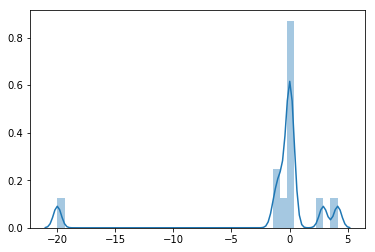

In [26]:
sns.distplot(coeff_df)

Now we have a fitted model where coefficients has been optimised using the Training data. Lets try to do the predictions using the Test dataset.

In [27]:
predictions = lm.predict(X_test)

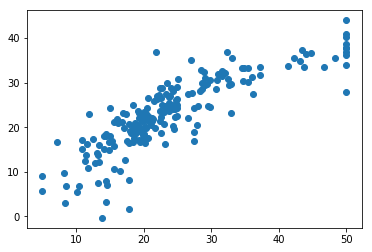

In [28]:
plt.scatter(y_test,predictions)

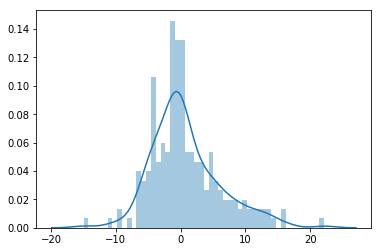

In [29]:
sns.distplot(y_test-predictions,bins=50)

Lets see some Evaluation Metrics for this model after doing prediction.

In [30]:
from sklearn import metrics

In [31]:
print('MSE:',metrics.mean_squared_error(y_test,predictions))
print('MAE:',metrics.mean_absolute_error(y_test,predictions))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test,predictions)))

MSE: 29.416365467452824
MAE: 3.905144802627506
RMSE: 5.423685598138301
